# Understanding Descriptive Statistics

Import the necessary libraries here:

In [221]:
# Libraries

import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [175]:
# your code here

dice = [1, 2, 3, 4, 5, 6]

df = pd.DataFrame(random.choices(dice, k = 10), columns = ['value'])

df

,value
0,2
1,1
2,4
3,2
4,2
5,6
6,4
7,5
8,5
9,3


#### 2.- Plot the results sorted by value.

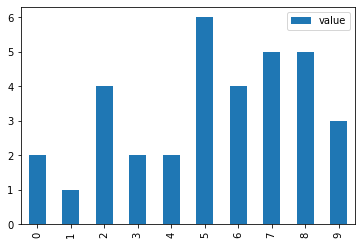

In [176]:
# your code here

df.plot(kind = 'bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

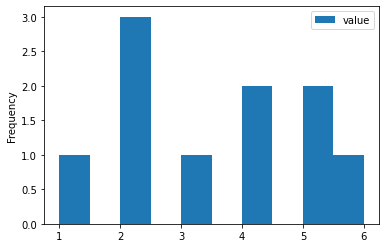

In [177]:
# your code here

df.plot(kind = 'hist')

In [ ]:
"""
your comments here

The first graph only represents the data from the dataframe, the second one counts, and plots.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [178]:
# your code here

def mean(df):
    return sum(df['value'])/len(df['value'])

mean(df)

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [179]:
# your code here

def mean_freq_dist(df):
    df_freq_dist = df['value'].value_counts().to_frame().reset_index()
    return sum(df_freq_dist['index']*df_freq_dist['value'])/len(df['value'])


mean_freq_dist(df)

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [180]:
# your code here

def median(df):
    rollings = df['value'].sort_values().to_list()
    if len(rollings)%2 == 0:
        return (rollings[len(rollings)//2]+rollings[(len(rollings)//2)-1])/2
    else:
        return rollings[(len(rollings)//2)]

median(df)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [181]:
# your code here

def quartiles(df):
    rollings = df['value'].sort_values().to_list()
    #first quartile:
    if (len(rollings)+1)%4 == 0:
        quartile1 = rollings[(len(rollings)+1)//4]
    else:
        quartile1 = (rollings[(len(rollings)+1)//4] + rollings[((len(rollings)+1)//4)+1])/2
    
    #second quartile:
    quartile2 = median(df)
    
    #third quartile:
    if ((len(rollings)+1)*3)%4 == 0:
        quartile3 = rollings[((len(rollings)+1)*3)//4]
    else:
        quartile3 = (rollings[((len(rollings)+1)*3)//4] + rollings[(((len(rollings)+1)*3)//4)+1])/2
        
    return f'First quartile: {quartile1}, second quartile: {quartile2}, third quartile: {quartile3}'


quartiles(df)

'First quartile: 2.0, second quartile: 3.5, third quartile: 5.5'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

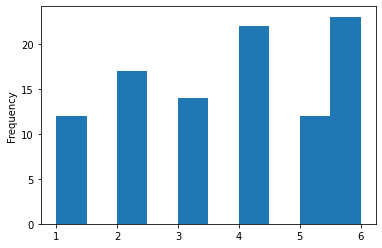

In [191]:
# your code here

df = pd.read_csv('../data/roll_the_dice_hundred.csv')
df.rename(columns = {'roll': 'index'}, inplace = True)

df['value'].plot(kind = 'hist')

In [ ]:
"""
your comments here

Frequency distribution is not equally distributed. Maybe 100 times are not enough for data to balance.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [183]:
# your code here

mean(df)

3.74

#### 3.- Now, calculate the frequency distribution.


In [184]:
# your code here

df['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

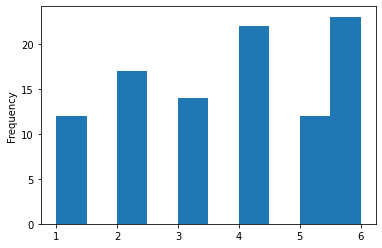

In [185]:
# your code here

df['value'].plot(kind = 'hist')

In [ ]:
"""
Frequency distribution is not equally distributed. The most repeated numbers are 4 and 6. We saw the mean is higher than 3 because of this.

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

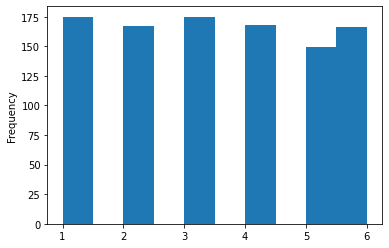

In [194]:
# your code here

df = pd.read_csv('../data/roll_the_dice_thousand.csv')
df.rename(columns = {'roll': 'index'}, inplace = True)

df['value'].plot(kind = 'hist')

In [ ]:
"""
your comments here

Frequency distribution is way more balanced. That's because this dataset is bigger.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

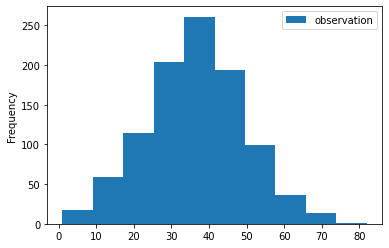

In [204]:
# your code here

df = pd.read_csv('../data/ages_population.csv')

df.plot(kind = 'hist')

'''
I'd say mean is around 36 and std 6.
'''


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [208]:
# your code here

df['observation'].mean()

36.56

In [209]:
df['observation'].std()

12.81649962597677

In [ ]:
"""
your comments here

The mean is more or less what I estimated. The std, I divided the above graph in 6 parts. The third point is the mean, and the next one is mean + std.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

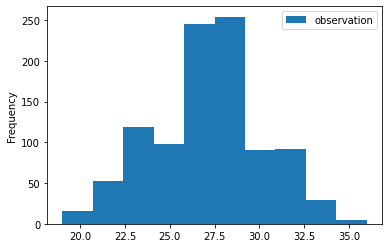

In [210]:
# your code here

df = pd.read_csv('../data/ages_population2.csv')

df.plot(kind = 'hist')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

We are only looking at a range of ages between 20 and 35, while before it was broader: 0-80. Also it's distribution is less like a normal one.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [212]:
# your code here

df['observation'].mean()

27.155

In [213]:
df['observation'].std()

2.9698139326891835

In [ ]:
"""
your comments here

Almost half of the dataset's population is between 26-28 years old. This means data is mostly around the mean, that explains std's value.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

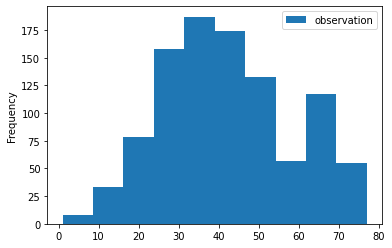

In [214]:
# your code here

df = pd.read_csv('../data/ages_population3.csv')

df.plot(kind = 'hist')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [215]:
# your code here

df['observation'].mean()

41.989

In [216]:
df['observation'].std()

16.14470595986593

In [ ]:
"""
your comments here

In this dataset data is more disperse: there is a peak around 25-45, and another one around 60-70 thus std is higher.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [220]:
# your code here

df.rename(columns = {'observation': 'value'}, inplace = True)

quartiles(df)

'First quartile: 30.0, second quartile: 40.0, third quartile: 53.0'

In [ ]:
"""
your comments here

25% of the people are under 30 years old.
50% of the people are under 40 years old.
75& of the people are under 53 years old.

The first quartile is high because between 0 and 30 the frequency is low. The next quartile is near, 40, because around that age we find the bigger
dataset's distribution peak. The next one gets higher because around 52-62 there is a low frequency and then another peak around 60-70-

If we didn't find that second peak, the third quartile would be smaller.

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [223]:
# your code here

percent = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
np.percentile(df['value'],percent)


array([22., 28., 32., 36., 40., 45., 50., 57., 67., 77.])

In [ ]:
"""
your comments here

The first percentile still starts quite high. Then it start's growing slow between the percentiles 20 (28 years old) and 40 (50 years old) matching
the bigger peak.
The last percentile is 77 years old, which means, the higher age is 77.

"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""